In [5]:
import pandas as pd
import numpy as np
import scipy
import heapq
import scipy.stats
import matplotlib.pyplot as plt

In [6]:
papers_filename = "/Users/jsennett/Code/top-k-insights/data/all-paperauths.csv"
df = pd.read_csv(papers_filename, encoding='mac_roman')
df['M'] = 1

```
 [0.09] Aggregating rank of count over authid, maximum point 26.00 stood out using normal test, considering only the subspace {'year': 2014}.
 [0.09] Aggregating delta_avg of count over paperid, maximum point 97.70 stood out using normal test, considering only the subspace {'year': 2014}.
 [0.09] Aggregating delta_avg of count over authid, maximum point 197.86 stood out using normal test, considering only the subspace {'year': 2014}.
 [0.09] Aggregating delta_avg of count over authid, maximum point 152.12 stood out using normal test, considering only the subspace {'year': 2014}.
 [0.09] Aggregating delta_prev of count over authid, maximum point 135.00 stood out using normal test, considering only the subspace {'year': 2014}.
 [0.94] Aggregating delta_avg of count over year, positive slope 33116.28 stood out using linear_shape test, considering only the subspace {}.
 [0.94] Aggregating pct of count over year, positive slope 0.38 stood out using linear_shape test, considering only the subspace {}.
 [1.0] Aggregating rank of count over year, negative slope -1.00 stood out using linear_shape test, considering only the subspace {}.
 [1.0] Aggregating delta_avg of count over authid, maximum point 1155.66 stood out using normal test, considering only the subspace {}.
 [1.0] Aggregating delta_avg of count over paperid, maximum point 116.08 stood out using normal test, considering only the subspace {}.
```

# Normal Test: delta_avg of count over paperid

In [8]:
df1 = df.groupby('paperid').agg({'M':'sum'})
print("max number of paperauths for a paperid:", max(df1['M']))
df1['delta_avg'] = df1['M'] - df1['M'].mean()
print("max delta_avg of count of paperauths for a paperid:", max(df1['M']))
df1.head()

max number of paperauths for a paperid: 119


,M
paperid,
0,1
5,1
9,3
10,4
11,1


In [ ]:
df1['rank'] = df1['delta_avg'].rank(method='first', ascending=False)

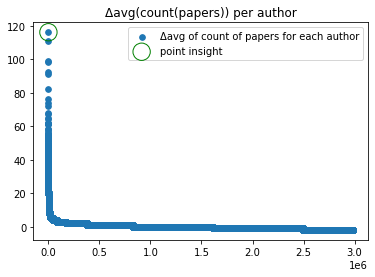

In [15]:
f1 = plt.scatter(df1['rank'], df1['delta_avg'], s=32, label='Δavg of count of papers for each author')
plt.scatter([1], max(df1['delta_avg']), color="none", edgecolor="g", s=300, label='point insight')
plt.title('Δavg(count(papers)) per author')
plt.legend()
plt.savefig('./figs/paperauths-1.png', bbox_inches = "tight")

# Normal Test: delta_avg of count over authid

In [20]:
df2 = df.groupby('authid').agg({'M':'sum'})
df2['delta_avg'] = df2['M'] - df2['M'].mean()
df2['rank'] = df2['delta_avg'].rank(method='first', ascending=False)

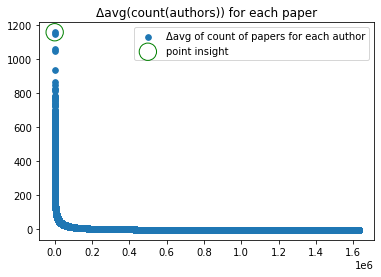

In [21]:
f2 = plt.scatter(df2['rank'], df2['delta_avg'], s=32, label='Δavg of count of papers for each author')
plt.scatter([1], max(df2['delta_avg']), color="none", edgecolor="g", s=300, label='point insight')
plt.title('Δavg(count(authors)) for each paper')
plt.legend()
plt.savefig('./figs/paperauths-2.png', bbox_inches = "tight")